<a href="https://colab.research.google.com/github/Dhrupandey/Dhrupandey/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['log_stand__housing_median_age', 'log_stand__total_rooms',
       'log_stand__total_bedrooms', 'log_stand__population',
       'log_stand__households', 'log_stand__median_income',
       'log_stand__median_house_value', 'encode__ocean_proximity_<1H OCEAN',
       'encode__ocean_proximity_INLAND', 'encode__ocean_proximity_ISLAND',
       'encode__ocean_proximity_NEAR BAY',
       'encode__ocean_proximity_NEAR OCEAN', 'scale__longitude',
       'scale__latitude'],
      dtype='object')
                        MAE       MSE  R-squared
Linear Regression  0.421160  0.312666   0.678578
Decision Tree      0.416207  0.354871   0.635191
Random Forest      0.298971  0.180030   0.814928
Gradient Boosting  0.352287  0.223186   0.770564
XGBoost            0.293255  0.173304   0.821843
Neural Network     0.320641  0.204840   0.789423
Best model: XGBoost


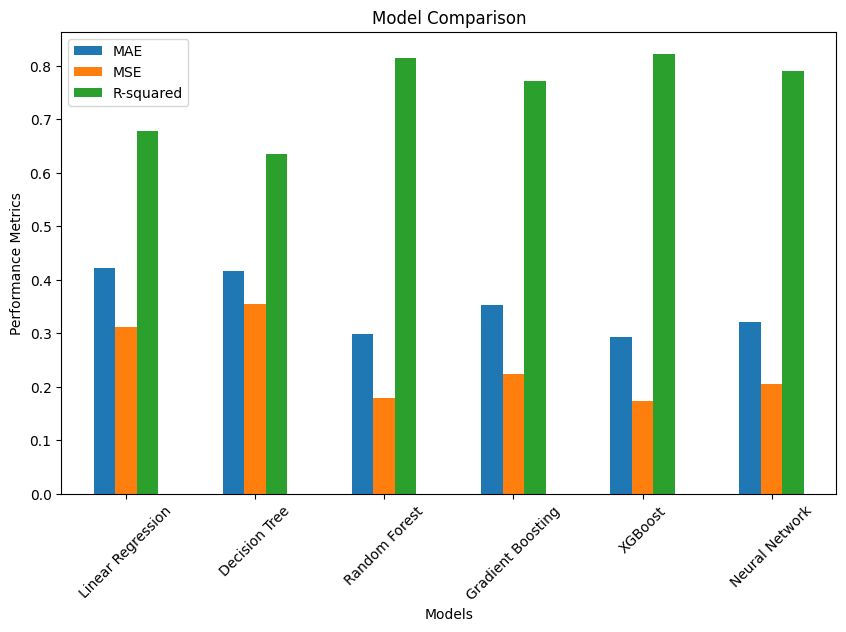

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from datasets import load_dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Loading the dataset
ds = load_dataset("Ryan-Pupia/CS482-HousingDataSet")

# Data preprocessing
df = pd.DataFrame(ds['train'])
# Inspecting the DataFrame to check column names
print(df.columns)

# Handling missing values (if any)
df = df.dropna()

# Define features and target variable
features = ['log_stand__housing_median_age', 'log_stand__total_rooms',
            'log_stand__total_bedrooms', 'log_stand__population',
            'log_stand__households', 'log_stand__median_income',
            'encode__ocean_proximity_<1H OCEAN', 'encode__ocean_proximity_INLAND',
            'encode__ocean_proximity_ISLAND', 'encode__ocean_proximity_NEAR BAY',
            'encode__ocean_proximity_NEAR OCEAN', 'scale__longitude',
            'scale__latitude']
X = df[features]
y = df['log_stand__median_house_value']  # Assuming this is the target variable

# Scaling the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R-squared': r2}

# Print the results
results_df = pd.DataFrame(results).T
print(results_df)

best_model_name = results_df['R-squared'].idxmax()
best_model = models[best_model_name]

print(f"Best model: {best_model_name}")

results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Performance Metrics')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost model
xgb = XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation R-squared: {best_score}")

# Train the final model with the best parameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Evaluate on validation set
y_pred_val = best_xgb.predict(X_val)
val_r2 = r2_score(y_val, y_pred_val)
print(f"Validation R-squared: {val_r2}")


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best cross-validation R-squared: 0.8261258662951954
Validation R-squared: 0.8314321035868981




```
# This is formatted as code
```

# New Section